In [1]:
import segyio
import numpy as np

import datetime
import os
import numpy as np

from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
import random 
# img.show()
from matplotlib import pyplot as plt
%matplotlib inline

def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf,dpi=300)
    buf.seek(0)
    img = Image.open(buf)
    return img

import os
def createFolderPath(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
datafolder=r'D:\Ameyem\python\ML\Data\SeismicImage\SynthImages/'

noisefolder=datafolder+'noise/'
cleanfolder=datafolder+'clean/'
createFolderPath(noisefolder)
createFolderPath(cleanfolder)
# createFolderPath(testfolders[lbl])

In [5]:
seismicdatafolder=r'D:\ArunAntelopus\Cambay work\BakrolData\\'
segyfile='Final_3D_Pre_STM_STK_vol_petexport.sgy'

seismicdatafolder=r'C:\Users\ArunBabu\ANTELOPUS ENERGY PRIVATE LIMITED\GeoTech - Documents\2. D-31\0. Data from DGH\MB-OSDSF-D-31-2018\D-31\Data-Package_Part_A\Seismic\3D\\'
# seismicdatafolder=datafolder#+'BAKROL 3D_SEISMIC_PSTM\\3D PSTM_SEGY DATA\\'
segyfile='3D02-DCS-ND1_2_5D_PSTM.sgy'

path='D:\Ameyem\python\inversion&spect_decomp\d11_data\\'+'NEC-OSN-97_2_NORTH_3D_crop_forSpectrum.sgy'

# path=folder+'NEC-OSN-97_2_North_crop.sgy'
f = segyio.open(path)
x = segyio.tools.collect(f.trace[:])
# x = x.reshape((len(f.ilines), len(f.xlines), len(f.samples)))
# np.all(x == segyio.tools.cube(f))
# # with segyio.open(path, "r") as f:
# #     x = segyio.tools.collect(f.traces[:])
# #     print(f.ilines)
# # dir(f)
print(x.shape,len(f.ilines), len(f.xlines))


# path=seismicdatafolder+segyfile
# f = segyio.open(path)
# x = segyio.tools.collect(f.trace[:])

# sourceX = f.attributes(segyio.TraceField.SourceX)[:]
# sourceY = f.attributes(segyio.TraceField.SourceY)[:]

(220951, 4000) 551 401


In [6]:
# vol=x.reshape(len(np.unique(sourceY)),len(np.unique(sourceX)),x.shape[1])
vol=x.reshape(len(f.ilines), len(f.xlines),x.shape[1])
vol.shape

(551, 401, 4000)

In [71]:
vol=vol[:,:,:3000]

In [3]:
# import matplotlib.pyplot as plt
# fig=plt.figure(figsize=(12,8))
# plt.imshow(vol[400][:,1000:1500].T)


In [5]:
# import yaml

# with open("./config.yml", "r") as stream:
#     try:
#         cfg=yaml.safe_load(stream)
#         print()
#     except yaml.YAMLError as exc:
#         print(exc)
# # cfg

In [36]:



# ss=vol[400][:,1250:1500]
def randomcrop(im):
    width, height = im.size

    # Setting the points for cropped image
    left = np.random.randint(0,int(width/2)-40)
    top = np.random.randint(0,int(height/2)-20)
    right = np.random.randint(int(width/2),int(width))
    bottom = np.random.randint(int(height/2),int(height))

    # Cropped image of above dimension
    # (It will not change original image)
    return im.crop((left, top, right, bottom))

    # fig.tight_layout()
    # plt.tight_layout()


In [4]:
# clnimg.size,grdimg.size

In [5]:
# fname='test.png'
# fig.savefig(fname,dpi=300)




# import numpy as np
# import matplotlib.pyplot as plt


# x = np.arange(-3,3)
# plt.plot(x)
# fig = plt.gcf()



# fimg.show()
# list(range(1,100,10))
# list(range(0,ntraces,xlininterval))


In [417]:

# plt.figure(figsize=(32, 8))
# plt.imshow(fimg)

In [174]:

# # direction,cfg['grid_time']
# cfg['opacity']=0
# cfg['grid_alpha']=0.4
# # cfg

In [34]:
imdatafolder='D:\Ameyem\python\ML\Data\SeismicImage\inputpaper/'
files=os.listdir(imdatafolder)

l=1
direction='i'
ax=None
skip=1
perc=99.0

rgb=(0, 0, 0)
alpha=0.5

dt=2
l

inlines=np.arange(5,vol.shape[0],5)
xlines=vol.shape[1]
tpoints=vol.shape[2]

len(list(inlines))

110

In [75]:
# inlines
# len(files)
# inlines
inlines=np.arange(5,vol.shape[0],5)
xlines=vol.shape[1]
ilines=vol.shape[0]
xlines=np.arange(5,vol.shape[1],5)

In [76]:
def getImages(ss):
    gain=0.2+np.random.random()/1.5
    lw=0.1+np.random.random()/2
    ntraces=ss.shape[0]
    t=np.arange(ss.shape[1])*dt
    figsize=(np.random.randint(10,32), np.random.randint(4,12))
#     figsize=(28,8)
    fig = plt.figure(figsize=(np.random.randint(10,32), np.random.randint(4,12)))
    # ax = fig.add_subplot(111)
    ax =fig.add_axes([0.0, 0.0, 0.999, 0.999])
    fig.subplots_adjust(hspace=0.0)
    data = ss

    sc = np.percentile(data, perc)  # Normalization factor
    wigdata = data[::skip, :]
    xpos = np.arange(ntraces)[::skip]
    
    vertlininterval=np.random.choice([10,20,50,60,75],1)[0]
#     horlininterval=100 #flat line
    horlininterval=np.random.choice([100,200,200,250,300,400],1)[0] #Time interval
    
#     vertlininterval=100
    for x, trace in zip(xpos, wigdata):
        # Compute high resolution trace.
        amp = gain * trace / sc + x
    #     t = 1000 * self.tbasis
        hypertime = np.linspace(t[0], t[-1], (10 * t.size - 1) + 1)
        hyperamp = np.interp(hypertime, t, amp)

        # Plot the line, then the fill.
        ax.plot(hyperamp, hypertime, 'k', lw=lw)
        ax.fill_betweenx(hypertime, hyperamp, x,
                         where=hyperamp > x,
                         facecolor='black',
                         lw=0,
                         )
    ax.set_xlim([xpos[0],xpos[-1]])   
    ax.set_ylim([t[0],t[-1]])
    ax.invert_yaxis()
    
    clnimg = fig2img(fig)

    # ax.grid()
    # ax.axes.xaxis.set_visible(False)
    # ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_ticks(range(0,ntraces,vertlininterval))
    ax.axes.yaxis.set_ticks(range(t[0], t[-1],horlininterval))
    # if cfg['grid_time'] or cfg['grid_traces']:
    ax.grid(True)
    xlwidth=np.random.random()*np.random.randint(1,3)/2
    ylwidth=np.random.random()*np.random.randint(1,3)/2
    print('figsize,xlwidth,ylwidth,lw, gain: ',figsize,xlwidth,ylwidth,lw,gain)
    print('vertlininterval,horlininterval',vertlininterval,horlininterval)
    xlwidth,ylwidth=0.5,0.5
    for l in ax.get_xgridlines():
    #         l.set_color(utils.rgb_to_hex(cfg['grid_colour']))
        l.set_color('black')
        l.set_linestyle('-')
        l.set_linewidth(xlwidth)
        

    for l in ax.get_ygridlines():
    #         l.set_color(utils.rgb_to_hex(cfg['grid_colour']))
        l.set_color('black')
        l.set_linestyle('-')
        l.set_linewidth(ylwidth)

    
    grdimg = fig2img(fig)
    a=fig.clf()
    plt.close(fig)
    return clnimg,grdimg

# for ilne in inlines:
for ilne in xlines:
    if ilne>24:
        print(ilne,end=', ')
    #     xlinerange=range(np.random.randint(0,int(xlines/2)-100),np.random.randint(int(xlines/2)+50,xlines))
    #     vrange=np.array(range(np.random.randint(0,int(tpoints/2)-500),np.random.randint(int(tpoints/2)+50,tpoints)))
#         ss=vol[ilne][np.random.randint(0,int(xlines/2)-100):np.random.randint(int(xlines/2)+50,xlines),
#               np.random.randint(0,int(tpoints/2)-500):np.random.randint(int(tpoints/2)+50,tpoints)] 
        ss=vol[np.random.randint(0,int(ilines/2)-100):np.random.randint(int(ilines/2)+50,ilines),ilne,
              np.random.randint(0,int(tpoints/2)-500):np.random.randint(int(tpoints/2)+50,tpoints)] 
#         ss=vol[ilne][:,500:-500]    
        clnimg,grdimg=getImages(ss)
        inputimagepath=imdatafolder+np.random.choice(files)
        noisebaseim = Image.open(inputimagepath)
        try:
            noisebaseim=randomcrop(noisebaseim)
        except:
            None
        noisebaseim = noisebaseim.resize(grdimg.size)
        noisebaseim = noisebaseim.convert("RGBA")
        alpha=np.random.randint(4,9)+np.random.random()
        noiseim=Image.blend( noisebaseim,grdimg,alpha=alpha)
        
        # img.paste(fimg, (100, 0), fimg)
#         noiseim.show()
        
        clnimg.save(cleanfolder+'{}_xd11.png'.format(ilne))
        noiseim.save(noisefolder+'{}_xd11.png'.format(ilne))
#         break
    
#     break

25, figsize,xlwidth,ylwidth,lw, gain:  (15, 8) 0.15470697938348277 0.3000206482134366 0.2775801749553911 0.5382385859029181
vertlininterval,horlininterval 10 200
30, figsize,xlwidth,ylwidth,lw, gain:  (12, 10) 0.23300372132320957 0.2866068704759491 0.49986558393252334 0.7353692448318179
vertlininterval,horlininterval 60 200
35, figsize,xlwidth,ylwidth,lw, gain:  (16, 4) 0.3072301325545736 0.3041602006480286 0.5102568548496418 0.23360964542792415
vertlininterval,horlininterval 50 400
40, figsize,xlwidth,ylwidth,lw, gain:  (14, 8) 0.5180737559151987 0.28877499747049423 0.18421044130438394 0.3378594903582915
vertlininterval,horlininterval 60 400
45, figsize,xlwidth,ylwidth,lw, gain:  (12, 7) 0.9903489080252075 0.3384453770613475 0.32532907842052705 0.7273613057976678
vertlininterval,horlininterval 60 250
50, figsize,xlwidth,ylwidth,lw, gain:  (26, 4) 0.03463971382417763 0.3242424268788731 0.42051362284150784 0.5230852956594562
vertlininterval,horlininterval 10 400
55, figsize,xlwidth,ylwi

280, figsize,xlwidth,ylwidth,lw, gain:  (18, 7) 0.20445410283037124 0.5023233386676381 0.12066944442231711 0.615734431856465
vertlininterval,horlininterval 50 200
285, figsize,xlwidth,ylwidth,lw, gain:  (31, 7) 0.9123524701933502 0.3844964336867347 0.22679622069338165 0.5860747426027748
vertlininterval,horlininterval 20 400
290, figsize,xlwidth,ylwidth,lw, gain:  (11, 9) 0.3865381622853408 0.6598857085771777 0.32776109233462536 0.524301366390141
vertlininterval,horlininterval 50 250
295, figsize,xlwidth,ylwidth,lw, gain:  (23, 9) 0.05275277277499557 0.41232178107379186 0.5096204900600763 0.802721096191672
vertlininterval,horlininterval 20 200
300, figsize,xlwidth,ylwidth,lw, gain:  (28, 8) 0.17232536009456023 0.042112169743867334 0.29890274483288826 0.7236353438149359
vertlininterval,horlininterval 10 300
305, figsize,xlwidth,ylwidth,lw, gain:  (12, 5) 0.06470673582079445 0.09085237036566884 0.1833877763247427 0.7703091246277141
vertlininterval,horlininterval 10 400
310, figsize,xlwidt

In [72]:
# ss.shape,vol.shape
xlines

401

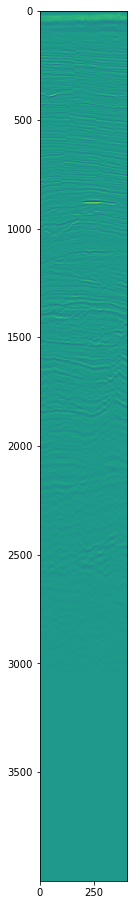

In [70]:
ss.shape,vol.shape
ss=vol[ilne][:,0:]
fig = plt.figure(figsize=(16, 16))
plt.imshow(ss.T)

In [534]:
# fimg.save('test3.png')
xlinerange,vrange
vol[ilne].shape
# 
xlinerange=np.arange(np.random.randint(0,int(xlines/2)-100),np.random.randint(int(xlines/2)+50,xlines))
vrange=np.arange(np.random.randint(0,int(tpoints/2)-500),np.random.randint(int(tpoints/2)+50,tpoints))



(705, 2501)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [542]:
# xlinerange,vrange
vol[ilne]
# newim.show()
np.random.randint(0,int(tpoints/2)-500),np.random.randint(int(tpoints/2)+50,tpoints)

(338, 2075)